# CS F415 Data Mining - Home Loan Approval

### Problem Statement & Data Set
Suppose a Finance Company offers home loans across urban, semi-urban,
and rural areas. The loan approval process typically spans 1 week to 1 month
due to extensive customer research.To streamline this, we'll employ Data
Mining techniques to automate and expedite loan approvals.

### About the dataset
The loan application data set includes various columns that provide
information on the applicant and the loan, such as Loan ID, Gender, Marital
Status,Dependents, Education, Self-Employment status, Applicant Income,
Co-Applicant Income, Loan Amount, Loan Amount Term, Credit History, and
Property Area.

## Data Preprocessing
### 1. Importing Dependencies and Datasets

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### Data
We have two csv files: train & test.

Train file contains all independent variables and target variables which'll be used to train the model. (i.e. train csv has loan_status column, but test csv doesn't)

Test file has independent variables, but not the target variables. This model will predict test variables for the test data.

In [5]:
train=pd.read_csv(r"C:\Users\HP\Downloads\loan-prediction-main\loan-prediction-main\datasets\loan_sanction_train.csv")
test=pd.read_csv(r"C:\Users\HP\Downloads\loan-prediction-main\loan-prediction-main\datasets\loan_sanction_test.csv")

In [6]:
print(train.shape)
train.head(10)

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


#### Checking for duplicates and missing values

In [7]:
print(f"No. of duplicates: {train.duplicated().sum()}")
train.isnull().sum()

No. of duplicates: 0


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* We have no duplicates, but have several missing values

In [8]:
train.select_dtypes('object').nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64


* Since the value of Loan_Id is unique for each row, we can remove Loan_ID as it won't be useful in model training.

In [9]:
train.drop(columns=['Loan_ID'],inplace=True)

In [10]:
train.describe(include="number") # describing numerical data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
desc = train.describe(exclude="number") # describing categorical data

for col in desc.columns:
    top_category = desc.loc['top', col]
    percentage = ((train[col] == top_category).mean()*100).round(2)
    desc.loc['top_percentage', col] = percentage

desc

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422
top_percentage,79.64,64.82,56.19,78.18,81.43,37.95,68.73


* There are more Male(79.64%) applicants than Female.
* Frequency of Married(64.82%) applicants is more.
* There are more Graduate(78.18%) applicants.

#### Data Visualization

##### Checking if Applicant Income is Normally Distributed

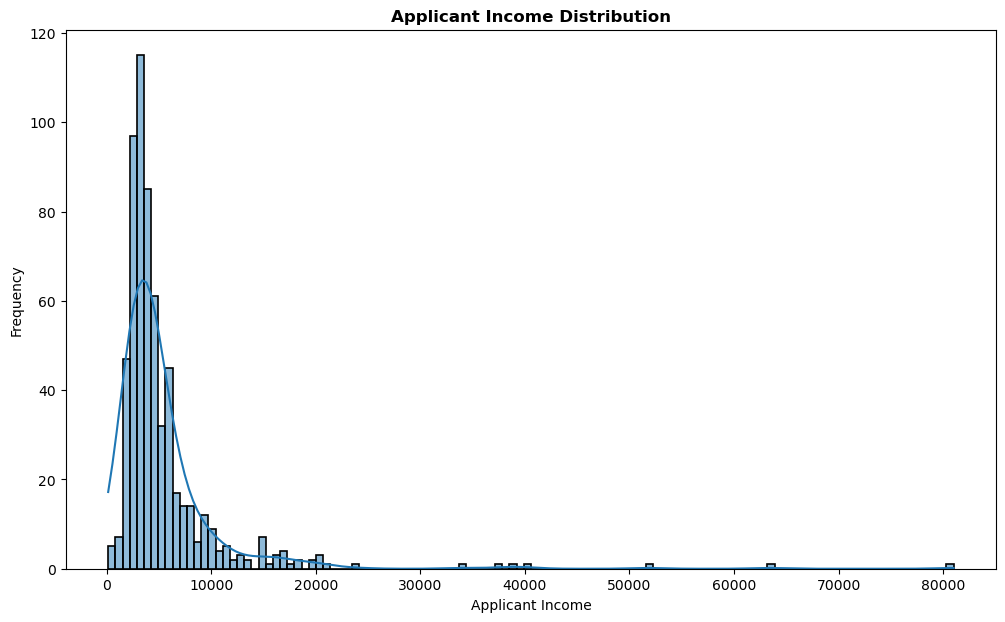

In [12]:

plt.figure(figsize=(12, 7))
sns.histplot(data=train, x="ApplicantIncome", kde=True,edgecolor='black', linewidth=1.2)

plt.title("Applicant Income Distribution",weight='bold')
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

* As per the histogram, there are outliers in the data as some data points deviate a lot from the majority.

##### Checking if Loan Amount is Normally Distributed

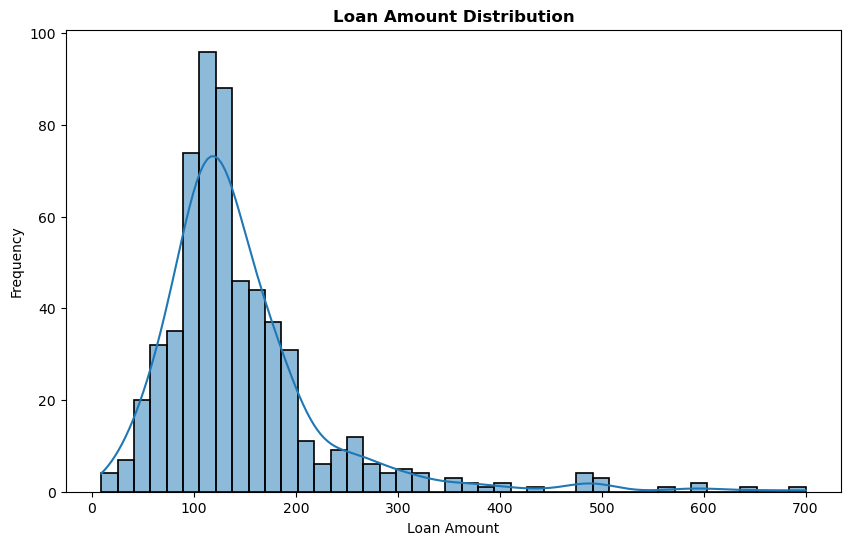

In [13]:

plt.figure(figsize=(10, 6))
sns.histplot(data=train, x="LoanAmount", kde=True,edgecolor='black', linewidth=1.2)

plt.title("Loan Amount Distribution",weight='bold')
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

Here we analyse the loan approval status by calculating the percentage of loans approved and plotting it on a bar graph representing loan status on X-axis and number of loans on Y-Axis.

In [14]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [15]:
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

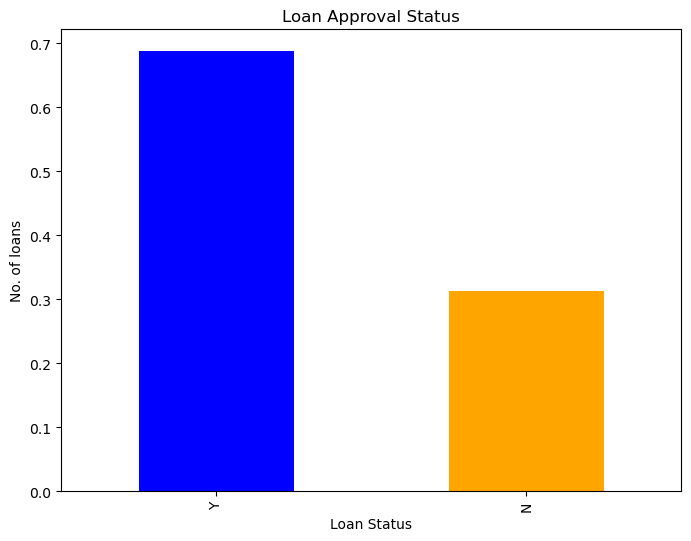

In [49]:
plt.figure(figsize=(8, 6))
train['Loan_Status'].value_counts(normalize=True).plot.bar(color=['blue', 'orange'])
plt.title('Loan Approval Status')
plt.xlabel('Loan Status')
plt.ylabel('No. of loans')
plt.show()

Conclusion: Around 68.72% of people got their loans approved.

Gender Distribution

In [19]:
train['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [23]:
train['Gender'].value_counts(normalize=True)

Gender
Male      0.813644
Female    0.186356
Name: proportion, dtype: float64

In [56]:
gender_counts = train['Gender'].value_counts(normalize=True).reset_index()
gender_counts.columns = ['Gender', 'Percentage']

fig = px.bar(gender_counts,
             x='Gender',
             y='Percentage',
             text='Percentage',
             labels={'Percentage': 'Ratio'},
             color='Gender',
             color_discrete_sequence=['blue', 'orange'],
             title='Gender Distribution',
             hover_data={'Gender': False, 'Percentage': ':.2%'},
             width=800, height=500)
fig.show()

Around 81.36% of loan applicants are male.

In [55]:
#Here we create a dataframe which contains counts and ratios
married_counts = train['Married'].value_counts(normalize=True).reset_index()
married_counts.columns = ['Married', 'Percentage']

fig = px.bar(married_counts,
             x='Married',
             y='Percentage',
             text='Percentage',                           #Percentage on bar graphs
             labels={'Percentage': 'Ratio'},              #Setting the y-axis name
             color='Married',
             color_discrete_sequence=['blue', 'orange'], 
             title='Marital Status Distribution',
             hover_data={'Married': False, 'Percentage': ':.2%'},
             width=800, height=500)

fig.show()

In [57]:
self_employed_counts = train['Self_Employed'].value_counts(normalize=True).reset_index()
self_employed_counts.columns = ['Self_Employed', 'Percentage']

fig = px.bar(self_employed_counts,
             x='Self_Employed',
             y='Percentage',
             text='Percentage',
             labels={'Percentage': 'Ratio'},
             color='Self_Employed',
             color_discrete_sequence=['#1f77b4', '#ff7f0e'],  
             title='Self Employment Status Distribution',
             hover_data={'Percentage': ':.2%'},
             width=800, height=500)
fig.show()

In [58]:
credit_history_counts = train['Credit_History'].value_counts(normalize=True).reset_index()
credit_history_counts.columns = ['Credit_History', 'Percentage']

fig = px.bar(credit_history_counts,
             x='Credit_History',
             y='Percentage',
             text='Percentage',
             labels={'Percentage': 'Ratio'},
             color='Credit_History',
             color_discrete_sequence=['red', 'green'],
             title='Credit History Distribution',
             hover_data={'Credit_History': False, 'Percentage': ':.2%'},
             width=800, height=500)
fig.show()

In [36]:
import plotly.subplots as sp
import plotly.graph_objects as go

fig = sp.make_subplots(rows=1, cols=3, subplot_titles=['Dependents', 'Education', 'Property Area'])

# Dependents
fig.add_trace(go.Bar(x=train['Dependents'].value_counts(normalize=True).index,   #takes unique index values of normalized counts
                     y=train['Dependents'].value_counts(normalize=True),
                     name='Dependents'),
                     row=1, col=1)

# Education
fig.add_trace(go.Bar(x=train['Education'].value_counts(normalize=True).index,
                     y=train['Education'].value_counts(normalize=True),
                     name='Education'),
              row=1, col=2)

# Property Area
fig.add_trace(go.Bar(x=train['Property_Area'].value_counts(normalize=True).index,
                     y=train['Property_Area'].value_counts(normalize=True),
                     name='Property Area'),
              row=1, col=3)

fig.show()

In [46]:
gender_loan_crosstab = pd.crosstab(train['Gender'], train['Loan_Status'])  #counts the occurences of each combination of genders and loan statuses

# Calculate the percentage distribution
gender_loan_percentage = gender_loan_crosstab.div(gender_loan_crosstab.sum(1).astype(float), axis=0)

#Now we reset the dataframe indices to make it suitable for further processing
gender_loan_percentage.reset_index(inplace=True)

# Create traces for each loan status
trace_not_approved = go.Bar(
    x=gender_loan_percentage['Gender'],
    y=gender_loan_percentage['N'],
    name='Not Approved',
    marker=dict(color='red')
)

trace_approved = go.Bar(
    x=gender_loan_percentage['Gender'],
    y=gender_loan_percentage['Y'],
    name='Approved',
    marker=dict(color='green')
)

layout = go.Layout(
    title='Loan Status by Gender',
    xaxis=dict(title='Gender'),
    yaxis=dict(title='Percentage'),
    barmode='stack',
)

fig = go.Figure(data=[trace_not_approved, trace_approved],layout=layout)
fig.show()

In [54]:
# Crosstabs
married_crosstab = pd.crosstab(train['Married'], train['Loan_Status'])
dependents_crosstab = pd.crosstab(train['Dependents'], train['Loan_Status'])
education_crosstab = pd.crosstab(train['Education'], train['Loan_Status'])
self_employed_crosstab = pd.crosstab(train['Self_Employed'], train['Loan_Status'])

# Normalize Crosstabs
married_normalized = married_crosstab.div(married_crosstab.sum(1).astype(float), axis=0)
dependents_normalized = dependents_crosstab.div(dependents_crosstab.sum(1).astype(float), axis=0)
education_normalized = education_crosstab.div(education_crosstab.sum(1).astype(float), axis=0)
self_employed_normalized = self_employed_crosstab.div(self_employed_crosstab.sum(1).astype(float), axis=0)

# Create subplots
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=['Married', 'Dependents', 'Education', 'Self Employed'],
                       specs=[[{'type': 'bar'}, {'type': 'bar'}],
                              [{'type': 'bar'}, {'type': 'bar'}]])

# Married subplot
fig.add_trace(go.Bar(x=married_normalized.index, y=married_normalized['Y'], name='Approved'),
              row=1, col=1)
fig.add_trace(go.Bar(x=married_normalized.index, y=married_normalized['N'], name='Not Approved'),
              row=1, col=1)
# Dependents subplot
fig.add_trace(go.Bar(x=dependents_normalized.index, y=dependents_normalized['Y'], name='Approved'),
              row=1, col=2)
fig.add_trace(go.Bar(x=dependents_normalized.index, y=dependents_normalized['N'], name='Not Approved'),
              row=1, col=2)

# Education subplot
fig.add_trace(go.Bar(x=education_normalized.index, y=education_normalized['Y'], name='Approved'),
              row=2, col=1)
fig.add_trace(go.Bar(x=education_normalized.index, y=education_normalized['N'], name='Not Approved'),
              row=2, col=1)
# Self Employed subplot
fig.add_trace(go.Bar(x=self_employed_normalized.index, y=self_employed_normalized['Y'], name='Approved'),
              row=2, col=2)
fig.add_trace(go.Bar(x=self_employed_normalized.index, y=self_employed_normalized['N'], name='Not Approved'),
              row=2, col=2)

# Update layout
fig.update_layout(title_text='Loan Approval Status by Categorical Variables',barmode='stack',showlegend=False)

# Show the plot
fig.show()

In [ ]:
# Crosstabs
credit_history_crosstab = pd.crosstab(train['Credit_History'], train['Loan_Status'])
property_area_crosstab = pd.crosstab(train['Property_Area'], train['Loan_Status'])

# Normalize Crosstabs
credit_history_normalized = credit_history_crosstab.div(credit_history_crosstab.sum(1).astype(float), axis=0)
property_area_normalized = property_area_crosstab.div(property_area_crosstab.sum(1).astype(float), axis=0)

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['Credit History', 'Property Area'],
                       specs=[[{'type': 'bar'}, {'type': 'bar'}]])
# Credit History subplot
fig.add_trace(go.Bar(x=credit_history_normalized.index, y=credit_history_normalized['Y'], name='Approved'),
              row=1, col=1)
fig.add_trace(go.Bar(x=credit_history_normalized.index, y=credit_history_normalized['N'], name='Not Approved'),
              row=1, col=1)

# Property Area subplot
fig.add_trace(go.Bar(x=property_area_normalized.index, y=property_area_normalized['Y'], name='Approved'),
              row=1, col=2)
fig.add_trace(go.Bar(x=property_area_normalized.index, y=property_area_normalized['N'], name='Not Approved'),
              row=1, col=2)

# Update layout
fig.update_layout(title_text='Loan Approval Status by Credit History and Property Area',
                  showlegend=False)
# Show the plot
fig.show()